In [1]:
#----------Fájkezelés----------
import numpy as np
import pandas as pd
#import pandas_profiling
#import os
#ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')
#from vega_datasets import data
#from gapminder import gapminder

#import aethos as at

#----------Statisztika----------
from pandas_summary import DataFrameSummary
import researchpy as rp
#from scipy import stats
import scipy.stats

#----------Vizualizáció----------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import ipywidgets
#import qgrid

#----------Sklearn----------
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor
#from sklearn.metrics import r2_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.datasets.samples_generator import make_regression
#from sklearn.preprocessing import StandardScaler

#from scipy.optimize import curve_fit 

In [280]:
np.random.seed(3)
szamok = [np.random.randint(1, 100) for i in range(100)]
szamok.insert(50, 170)
szamok.insert(51, -50)
szamok = {'Számok': szamok}
df = pd.DataFrame(szamok)
df.head()

,Számok
0,25
1,4
2,57
3,73
4,1


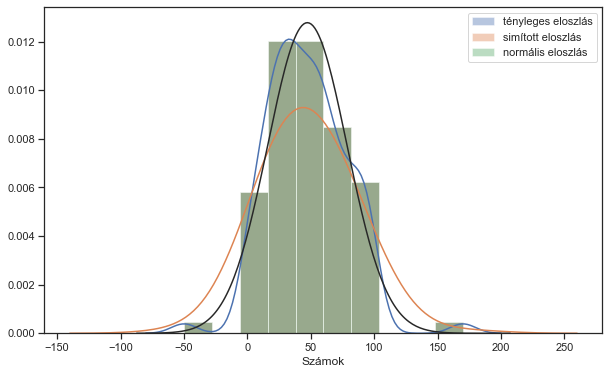

In [281]:
from scipy.stats import norm

plt.figure(figsize=(10, 6))
sns.distplot(df['Számok'], bins=10, kde_kws=dict(bw=10), label='tényleges eloszlás')
sns.distplot(df['Számok'], bins=10, kde_kws=dict(bw=30), label='simított eloszlás')
sns.distplot(df, bins=10, fit=norm, kde=False, label='normális eloszlás')
plt.legend()

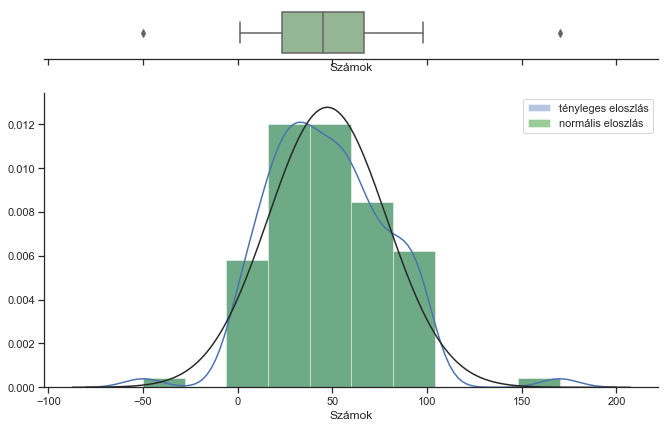

In [288]:
from scipy.stats import norm

def hist_box(df, oszlop, binsize, simítás):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(11, 7))
    bin_méret=10

    sns.boxplot(df[oszlop], color='darkseagreen', ax=ax_box)
    sns.distplot(df[oszlop], bins=binsize, kde_kws=dict(bw=simítás), label='tényleges eloszlás', ax=ax_hist)
    sns.distplot(df[oszlop], fit=norm, bins=binsize, color='green', kde=False, label='normális eloszlás', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.legend()
    
hist_box(df, 'Számok', 10, 10)

In [283]:
def kiugró(df, oszlop, xstd):
    regularized = []
    n=0

    for i, x in enumerate(df[oszlop]):
        regularized.append((x-df[oszlop].mean())/df[oszlop].std())
        if ((regularized[i] > xstd) or (regularized[i] < -xstd)):
            print(df[oszlop][i])
            n+=1
    print(n, ' darab kiugró érték')

kiugró(df, 'Számok', 2.6)

170
-50
2  darab kiugró érték


###   
### Descriptives

In [286]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Számok
count,102.00
mean,47.30
std,31.37
min,-50.00
25%,23.50
50%,45.00
75%,66.50
max,170.00


mean                          47.30
std                           31.37
variance                     984.37
min                             -50
max                             170
mode                             22
5%                             3.00
25%                           23.50
50%                           45.00
75%                           66.50
95%                           94.95
iqr                           43.00
kurtosis                       1.58
skewness                       0.42
sum                            4825
mad                           24.85
cv                             0.66
zeros_num                         0
zeros_perc                       0%
deviating_of_mean                 1
deviating_of_mean_perc        0.98%
deviating_of_median               1
deviating_of_median_perc      0.98%
top_correlations                   
counts                          102
uniques                          65
missing                           0
missing_perc                

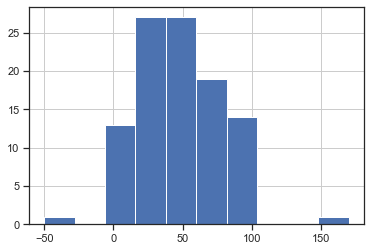

In [287]:
dfs = DataFrameSummary(df)
dfs['Számok']